In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['class'] = wine.target

In [2]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Il dataset in esame contiene dati riguardanti vini: ciascuna delle 13 colonne presenti riporta un valore numerico che descrive la relativa proprietà chimica espressa dal nome della colonna.

Non è riportata l'unità di misura.


La colonna 'class' indica, invece, la classe di appartenenza per ciascuno dei vini (178 record) inseriti nel dataset. Più precisamente, questa identifica l'azienda di provenienza del vino: pertanto, seppur espressa in termini numerici, le classi non sono ordinate e non necessariamente vogliono esprimere un'indicazione di qualità del vino.

In questo notebook mi occuperò di una analisi esplorativa del dataset ricorrendo dove necessario alla rappresentazione grafica di quanto trovato per rendere più veloce l'accesso alle informazioni che emergono; nella seconda parte del notebook addestrerò un algoritmo di classificazione che possa attribuire la giusta classe ai nuovi vini che verranno inseriti in futuro nel database di pertinenza. 

### Pulizia dei dati

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

Non ci sono valori mancanti né duplicati.

Il dataset, essendo creato ad hoc, è già pulito di per sé. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

Tutte le colonne sono del corretto datatype, non c'è bisogno di alcuna modifica.

I nomi delle colonne sono chiari ed esplicativi di ciò a cui si riferiscono.

## Analisi Esplorativa

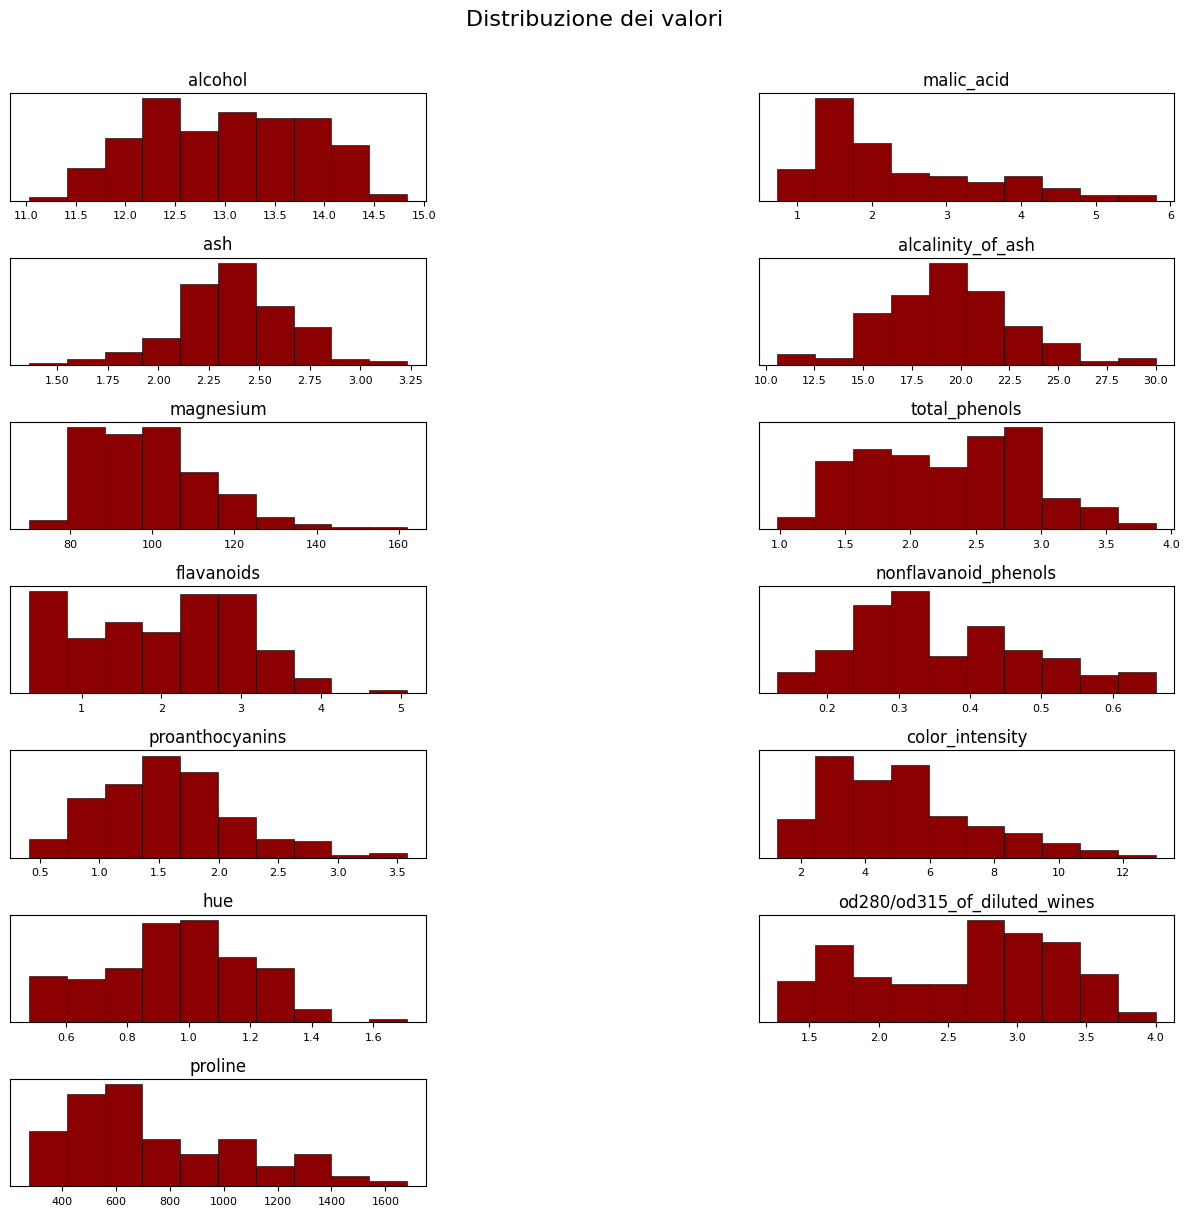

In [6]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12,12))
axes = axes.ravel()

for ax,col in zip(axes, df.drop(columns='class').columns):
    ax.hist(df[col], density=True, bins=10, edgecolor='k', linewidth=0.4, color='darkred')
    ax.set_title(f"{col}")
    ax.tick_params(axis='x', labelsize=8) 
    ax.yaxis.set_tick_params(labelleft=False)  
    ax.set_yticks([])

axes[-1].set_visible(False)

plt.suptitle("Distribuzione dei valori", fontsize=16, y=1.01)
plt.tight_layout()
plt.subplots_adjust(wspace=0.8)

plt.show()

Gli istogrammi ci danno due metainformazioni: la prima è che ciascuna colonna è popolata da valori eterogenei tra loro, la seconda è che si attestano su scale di valori differenti tra loro. 
Eventualmente, a seconda del modello costruito, potrebbe essere essenziale standardizzare ciascuna delle colonne.

### Analisi per classi

La variabile classe è verosimilmente una variabile nominale, pur essendo espressa per numeri: non vi è alcuna ordinazione o preferibilità tra i valori riportati. 
Quali sono le differenze tra i valori medi in ciascuna delle classi? Analizziamo:

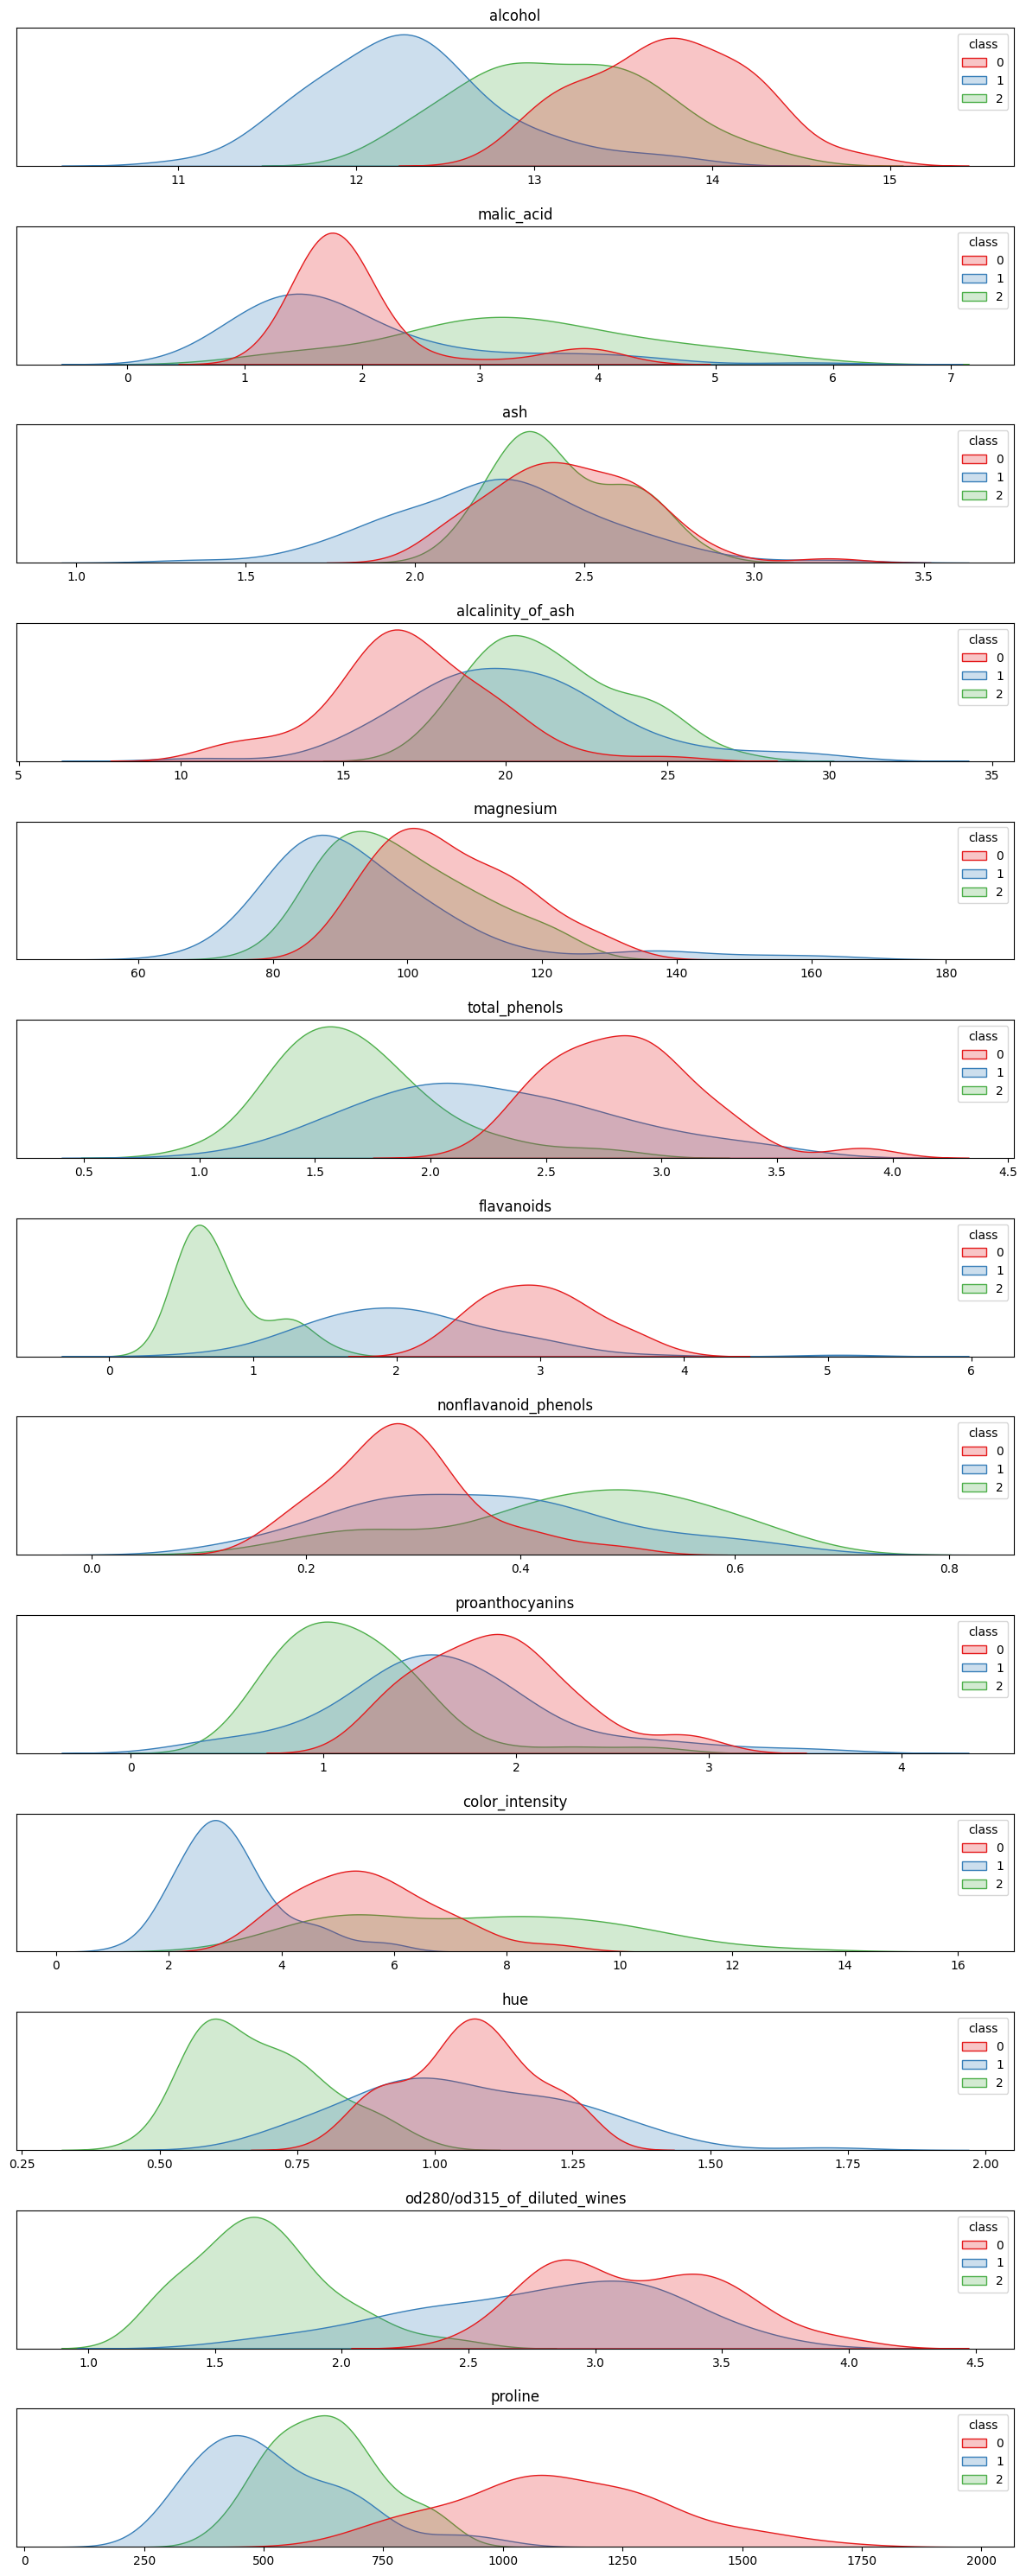

In [7]:
plt.figure(figsize=(12, 30))

palette = sns.color_palette("Set1", n_colors=df['class'].nunique())

#itero su tutte le colonne, eccetto l'ultima, e plotto un kdeplot per mostrare le distribuzioni dei valori secondo la classe di appartenenza
for i, col in enumerate(df.columns[:-1]): 
    plt.subplot(len(df.columns) - 1, 1, i + 1)  
    sns.kdeplot(data=df, x=col, hue='class', fill=True, common_norm=False, palette=palette, legend=True)
    
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().yaxis.set_tick_params(labelleft=False)  
    plt.gca().set_yticks([])  

plt.subplots_adjust(hspace=2)

plt.tight_layout()
plt.show()

Questi grafici ci consentono di apprezzare la variabilità degli elementi secondo la classe di appartenenza.
Quasi tutte le distribuzioni sono approssimabili alla Gaussiana, alcune con asimmetria positiva ed altre con asimmetria negativa. Alcune presentano tuttavia un secondo punto di massimo locale, meno pronunciato del globale attorno a cui si estende il resto della distribuzione. Non si parla, pertanto, di distribuzioni bimodali.

Notiamo come alcune feature facciano emergere più variabilità in alcune classi mentre altre ne evidenziano la complessiva omogeneità.

Ad esempio, la classe 0 mostra un'elevata densità attorno al centro in tutte le variabili ad eccezione della 'proline' (ultimo grafico) in cui la distribuzione è molto più sparsa.

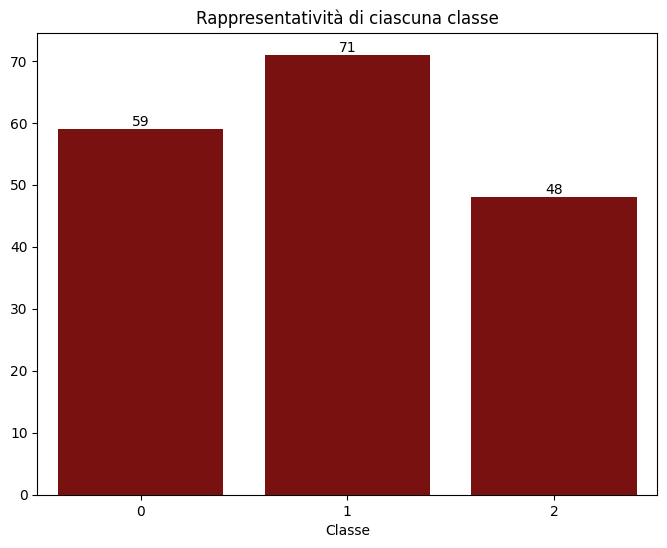

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=df, x='class', ax=ax, color='darkred')
ax.bar_label(ax.containers[0])

plt.title("Rappresentatività di ciascuna classe")
plt.xlabel("Classe")
plt.ylabel("")
plt.show()


La classe 2 è leggermente sotto-rappresentata.

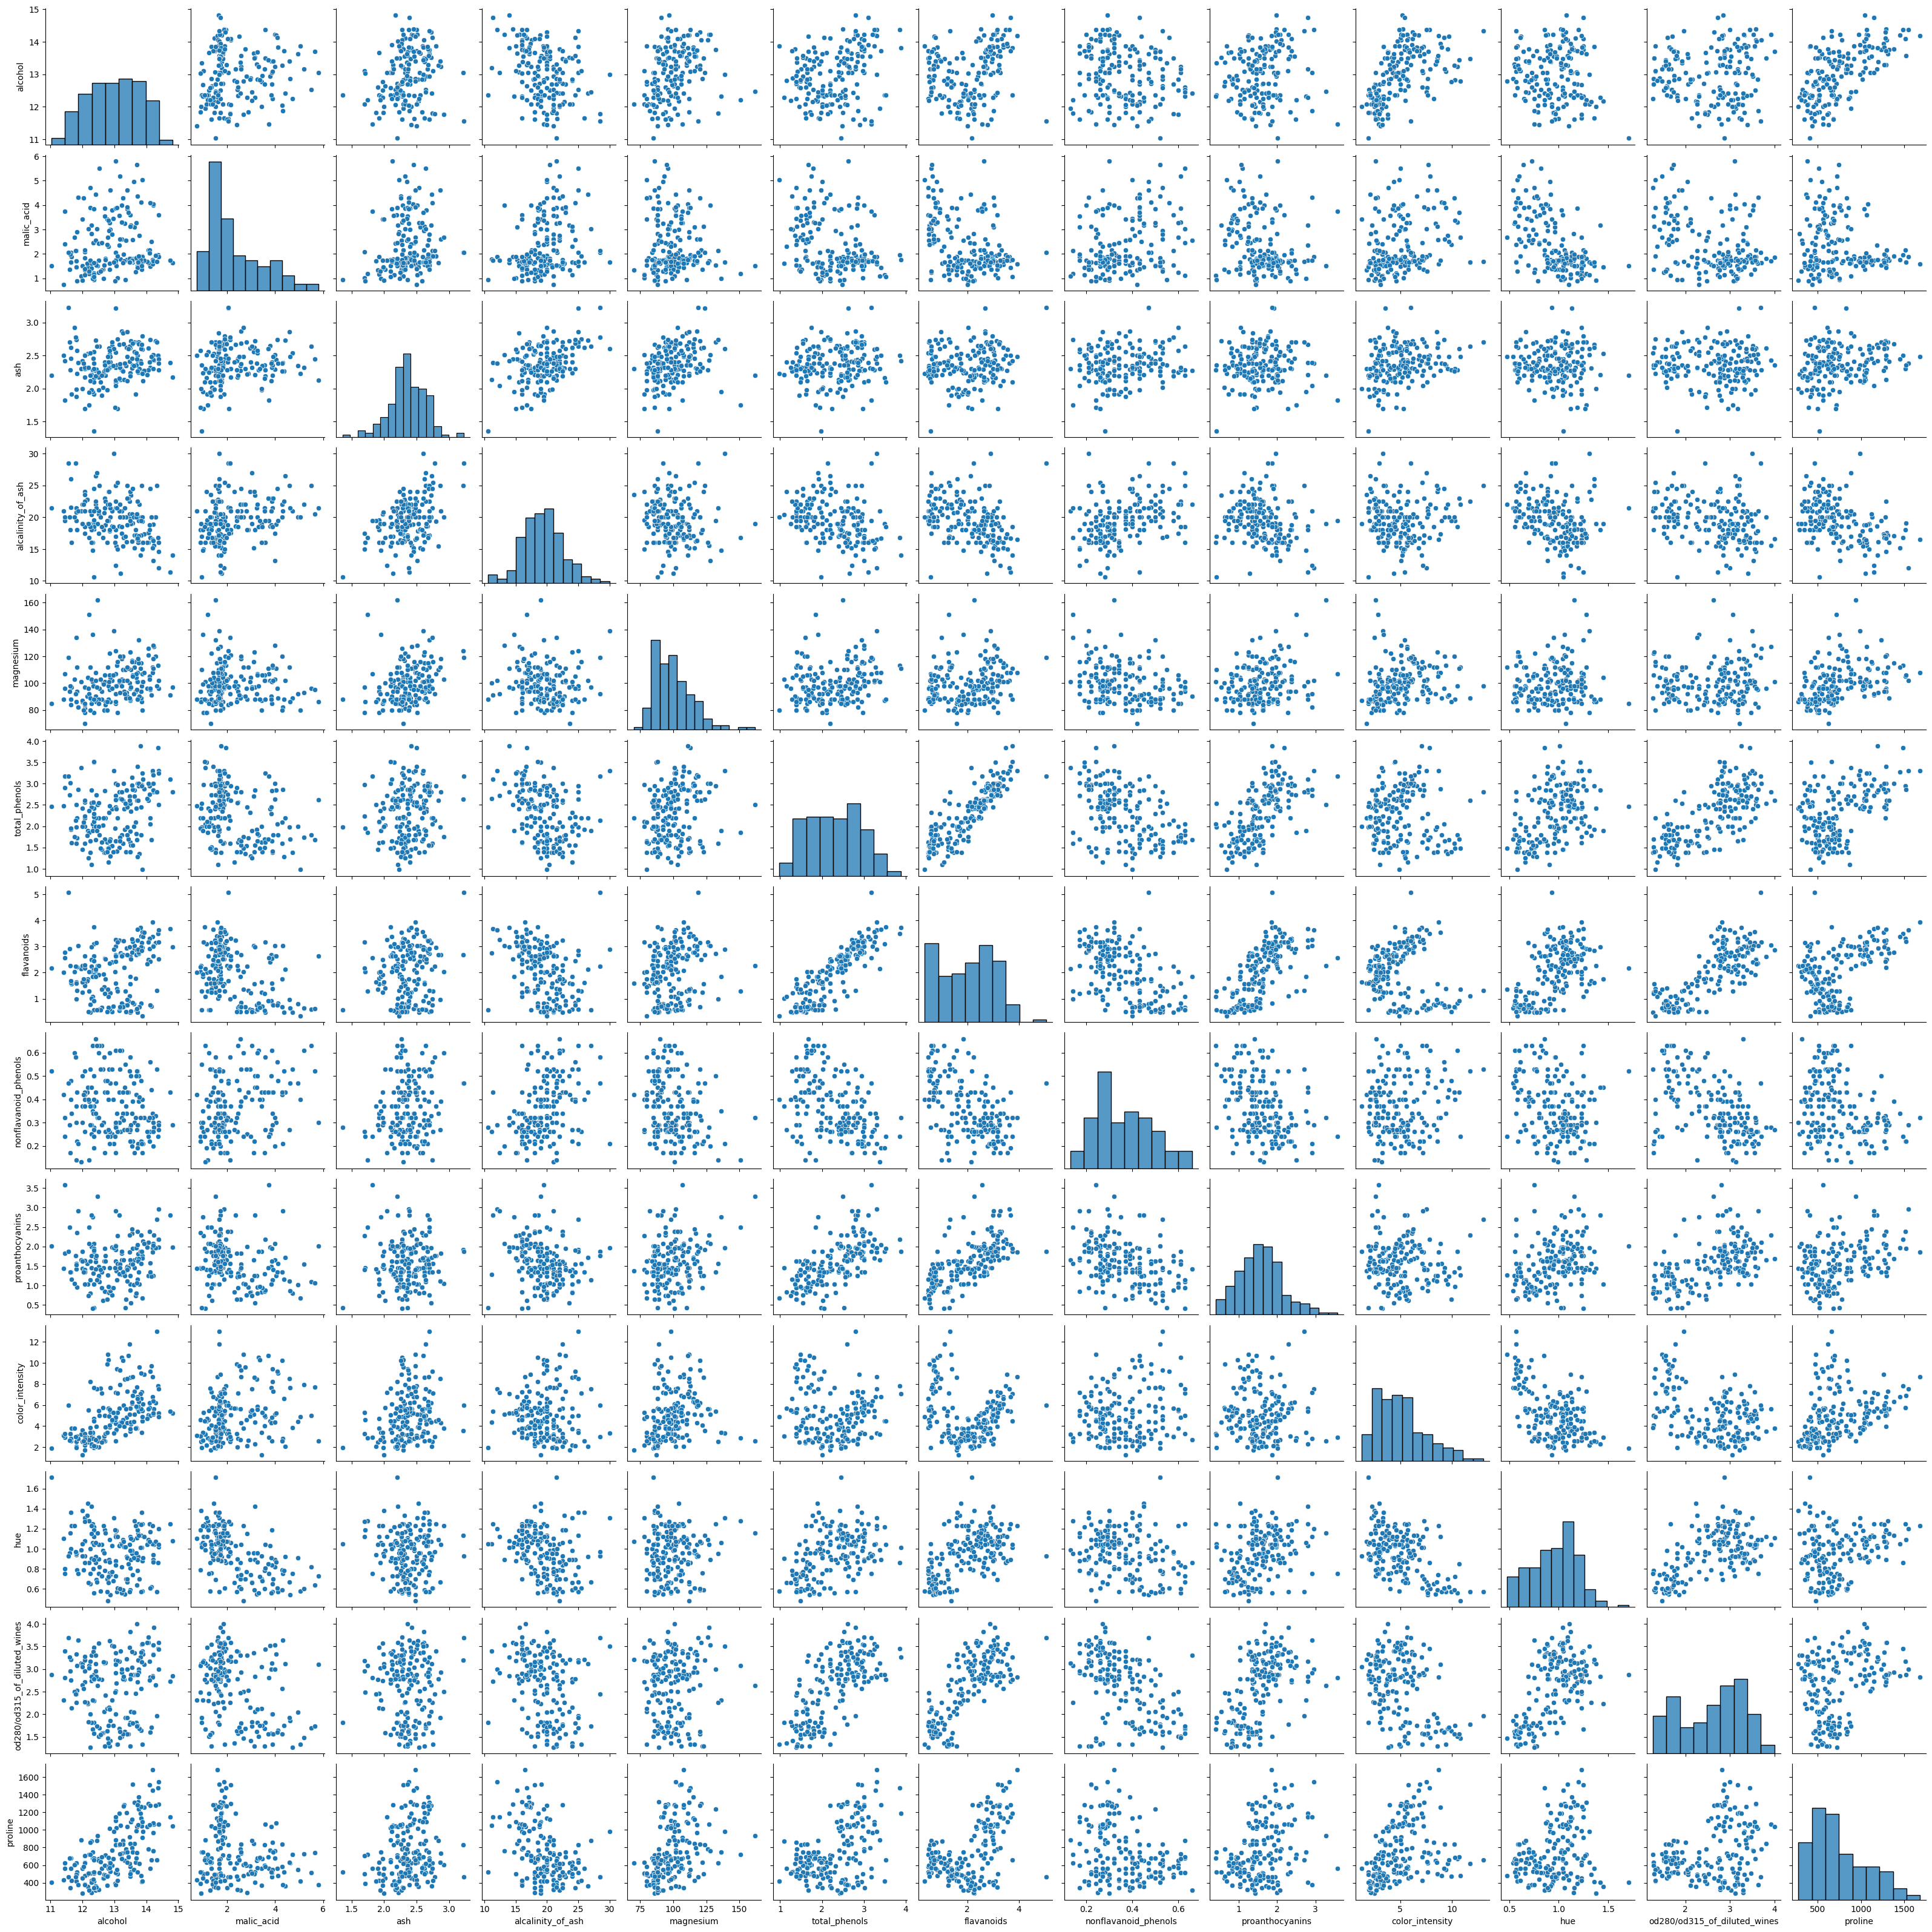

In [9]:
sns.pairplot(df.iloc[:,:-1])

Dal pairplot emerge come la colonna 'flavanoids' sia positivamente correlata con diverse altre feature. Osserviamo meglio:

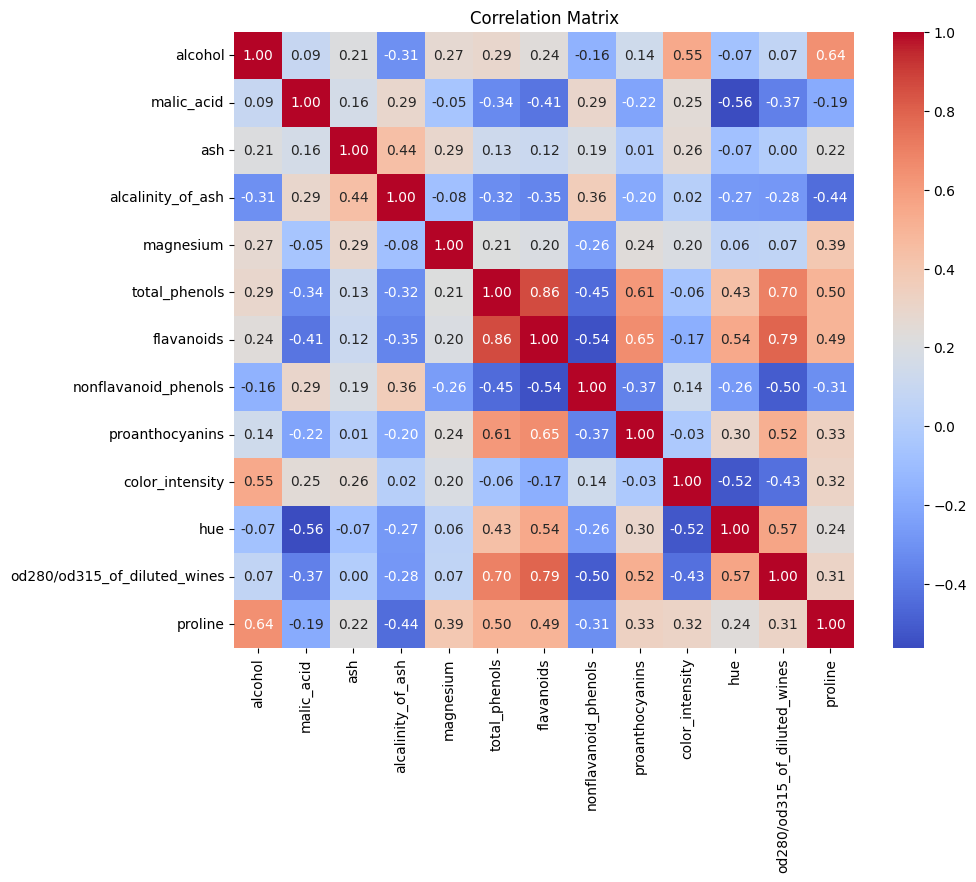

In [10]:
correlation_matrix = df.drop(columns='class').corr()

# Visualizza la matrice di correlazione come heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Fenoli e flavanoidi sono chimicamente simili, la correlazione così alta è verosimilmente naturale dunque, ma all'interno di un dataset potrebbe generare un po' di ridondanza informativa.
Se questo fosse il caso, sarebbe opportuno rivolgersi ad un professionista del vino con competenze in ambito chimico. 

Ipotizziamo puramente per curiosità che si tratti effettivamente di una possibile ridondanza: qui sotto calcolo il VIF, un quoziente che esprime il grado di multicollinearità per ciascuna delle variabili nel dataset:

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df.iloc[:,:-1])  
vif_data = pd.DataFrame() 
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.iloc[1:,:].sort_values(by="VIF",ascending=False)

,Variable,VIF
7,flavanoids,7.029350
6,total_phenols,4.334519
12,od280/od315_of_diluted_wines,3.785473
10,color_intensity,3.026304
13,proline,2.823849
11,hue,2.551447
1,alcohol,2.460372
4,alcalinity_of_ash,2.238732
3,ash,2.185448
9,proanthocyanins,1.975683


Flavanoids ha, infatti, un valore VIF molto alto, oltre la soglia ritenuta critica pari a 5.

Ci sono outlier nel dataset?

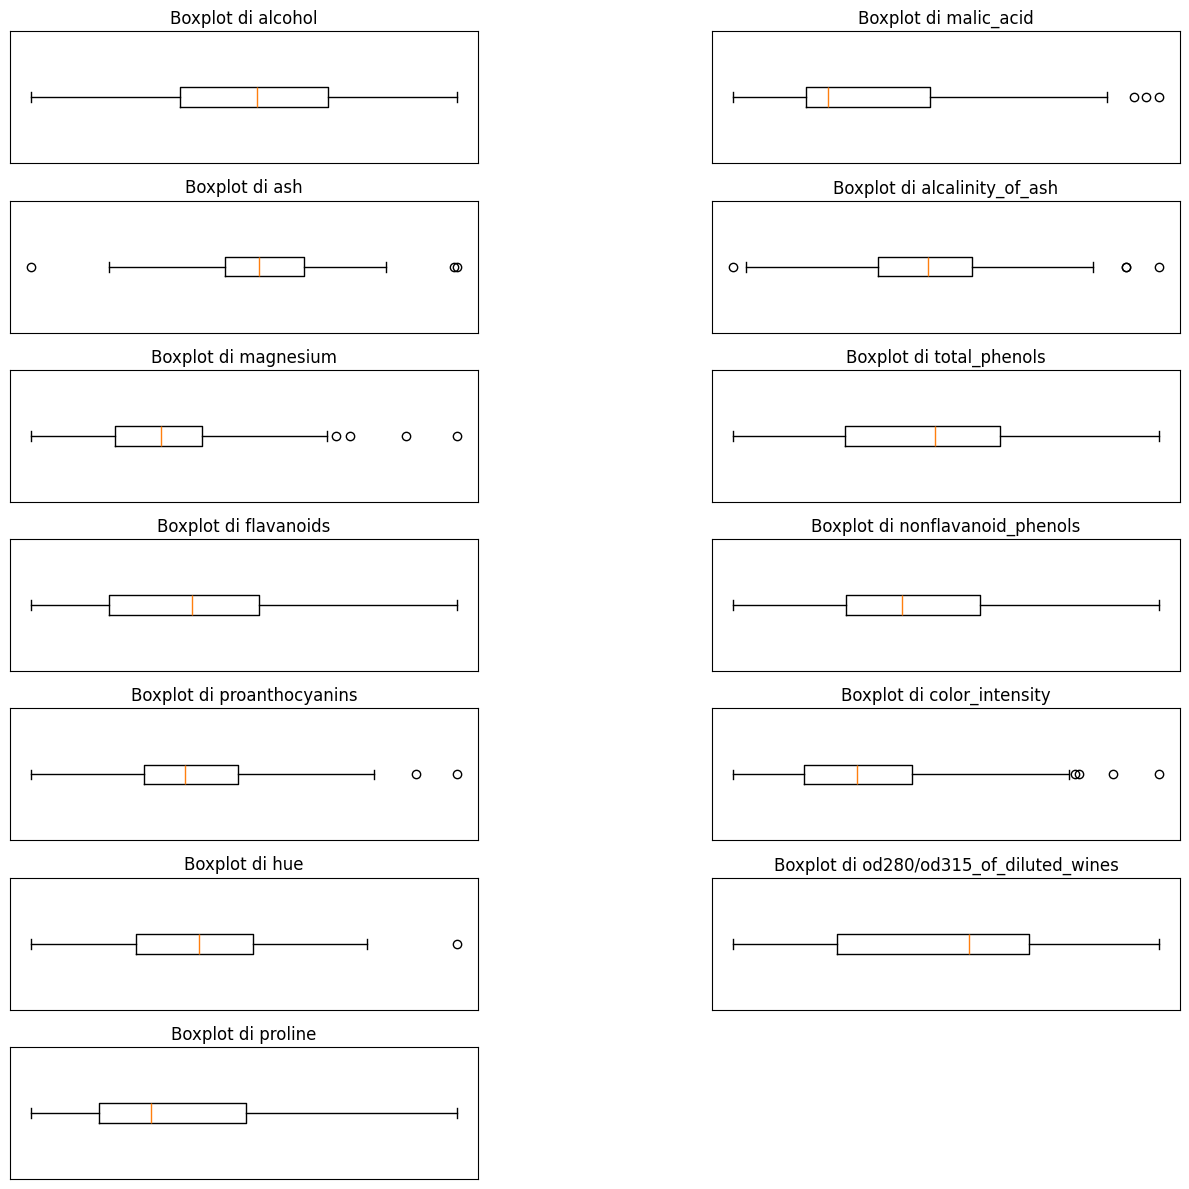

In [12]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12,12))
axes = axes.ravel()

for ax,col in zip(axes, df.drop(columns='class').columns):
    ax.boxplot(df[col], vert=False)
    ax.set_title(f"Boxplot di {col}")
    ax.tick_params(axis='x', labelsize=8) 
    plt.xlabel("")
    plt.ylabel("")
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])


axes[-1].set_axis_off()

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)

I boxplot mostrano come non ci siano molti outlier. 
Verifichiamo meglio:

In [13]:
for col in df.drop(columns="class").columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    out_low = Q1 - IQR*1.5
    out_up = Q3 + IQR*1.5
    number = df[col].apply(lambda x: 1 if x < out_low or x > out_up else 0).sum()
    print(f"Outlier in {col}: {number/len(df)*100:.2f}%") 

Outlier in alcohol: 0.00%
Outlier in malic_acid: 1.69%
Outlier in ash: 1.69%
Outlier in alcalinity_of_ash: 2.25%
Outlier in magnesium: 2.25%
Outlier in total_phenols: 0.00%
Outlier in flavanoids: 0.00%
Outlier in nonflavanoid_phenols: 0.00%
Outlier in proanthocyanins: 1.12%
Outlier in color_intensity: 2.25%
Outlier in hue: 0.56%
Outlier in od280/od315_of_diluted_wines: 0.00%
Outlier in proline: 0.00%


La quantità di outlier per ciascuna colonna è espressa in percentuale: notiamo che si tratta di pochi punti percentuali.

Il tema merita un ulteriore considerazione: si tratta di un dataset molto piccolo, con sole 178 righe. I valori che ora figurano come outlier, potrebbero cessare di esserlo se, per ipotesi, lo stesso dataset venisse aggiornato con ulteriori dati contenenti dei valori tali da trascinare il Q1 e il Q3 verso l'esterno e modificare così la soglia critica oltre la quale ricadono gli outlier. 
Non sapendo se si tratta inoltre di valori effettivamente anomali anche nella pratica, ritengo più opportuno non rimuovere quei valori.

## Machine Learning

L'obbiettivo è addestrare un modello di machine learning capace di classificare (problema di multiclasse) i diversi vini sulla base delle loro proprietà chimiche.
Il dataset è relativamente piccolo, con circa 180 record e 13 colonne: stando alla guida ufficiale di Sklearn (https://scikit-learn.org/stable/machine_learning_map.html), in questa situazione l'argoritmo suggerito è il SVC Lineare.
Effettuo un primo addestramento veloce, senza troppe pretese, per vedere come si comporta questo algoritmo.

Ancor prima addestro un algoritmo di __Logistic Regression__, con la stessa logica esposta sopra, per avere un punto di partenza ancora più semplice. 

Un approccio ancor più semplice di questo sarebbe costruire un classificatore che predice per ogni istanza la classe più comune del dataset, ovvero la classe 1 (presente 71 volte). 

Si tratta di un problema di classificazione: userò __'Accuracy', 'Precision', 'Recall', 'F1'__ come metriche per misurare la bontà delle previsioni.

Sarà importante anche una matrice di confusione, per dare un'idea più immediata dei pregi e dei difetti della classificazione operata.

Come sottolineato all'inizio dell'Analisi Esplorativa, le features si attestano su scale di valori molto distanti tra loro. Sarà dunque necessario utilizzare lo StandardScaler() di sklearn per rendere più omogenea la magnitudine delle feats. 

In [14]:
#import di tutte le librerie che serviranno

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    recall_score,
    precision_score,
)

In [15]:
# preparo i dati separando in feats e target e standardizzando i primi

X = df.drop('class', axis=1)
y = np.array(df['class'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

Prima di procedere con gli algoritmi più accreditati, riporto due modelli estremamente semplici: il primo predice sempre il valore modale (dirà sempre 1), il secondo è un DummyClassifier, con strategia 'stratify': dirà una classe a caso tenendo conto di come queste sono distribuite nel dataset.

In [16]:
from scipy.stats import mode
(y == mode(y)[0]).sum()/len(y)

0.398876404494382

In [17]:
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 50,
    stratify=y,
    random_state=42
)

dclf = DummyClassifier(strategy='stratified', random_state=42)
dclf.fit(X_train, y_train)

f1_score(y_test, dclf.predict(X_test), average='weighted')

0.3936075036075036

Usiamo come benchmark il risultato di questi due modelli molto poco pretenziosi: il primo è 'aprioristico', il secondo praticamente randomico. Entrambi comunque non eccedono il punteggio (rispettivamente in accuracy e F1) di 0.40.

Non per tutti i problemi si trova la soluzione più efficiente in modelli sofisticati di Machine Learning; l'impostazione dei due 'modelli' precedenti è per avere un punteggio che faccia da soglia minima, tenendo in considerazione che il costo computazionale è praticamente nullo.

Sarà mio compito accertarmi se ci sia possibilità o meno di ottenere delle previsioni più centrate con costi computazionali ragionevoli.

### Logistic Regression

In [18]:
# primo round di training senza alcuna pretesa, 'quick and dirty'
logreg = LogisticRegression()

%timeit logreg.fit(X_train, y_train)

2.56 ms ± 92.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


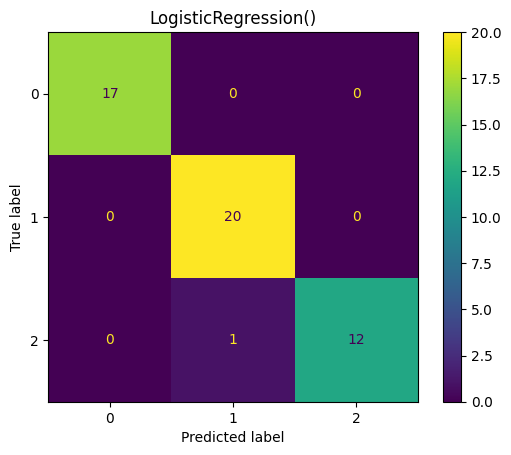

Risultati su Test set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      1.00      0.98        20
           2       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50


Risultati su Train set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        35

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



In [19]:
def performance_report(model):
    '''
    la funzione genera automaticamente Classification Report per training set e test set e una matrice di confusione sul test set; 
    arg* necessario è il modello; fittato o meno, fa poca differenza: la prima stringa lo addestra per evitare ambiguità col training sull'ultimo fold della funzione introdotta più avanti;
    si presuppone che all'interno del notebook il dataset venga diviso una sola volta e lo split non più modificato;
    ''' 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(conf_matrix, display_labels=[0,1,2])
    ax = display.plot()
    ax.ax_.set_title(model)
    plt.show()

    print("Risultati su Test set:\n ", classification_report(y_test, y_pred))
    print("\nRisultati su Train set:\n ", classification_report(y_train, model.predict(X_train)))

performance_report(logreg)

La Confusion Matrix mostra un risultato molto promettente; 

la differenza nei due Class.Report suggerisce che l'algoritmo potrebbe star overfittando i dati di training.

### SVC Lineare

830 µs ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


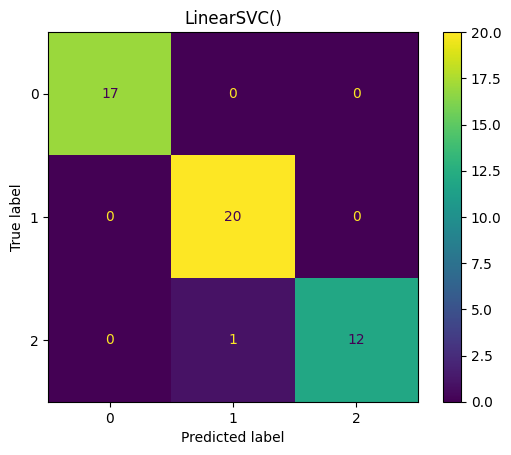

Risultati su Test set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      1.00      0.98        20
           2       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50


Risultati su Train set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        35

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



In [20]:
svc_class = LinearSVC()

%timeit svc_class.fit(X_train, y_train)  #chiamo questo fit per un'idea sul tempo impiegato

performance_report(svc_class)

I risultati sono identici, entrambi gli algoritmi registrano lo stesso punteggio nelle metriche ed etichettano incorrettamente come classe '1' un vino appartenente, in realtà, alla classe 2. 

Considerando che la classe 2 è meno numerosa nel dataset, è probabile che questi due modelli non riescano a generalizzare benissimo per questa classe.

### Cross Validation per SVC e LogReg

I dati a disposizione sono pochi: potrebbe essere una buona scelta ricorrere alla Cross Validation ed eventualmente alla StratifiedKFold per essere più sicuri riguardo la robustezza del modello;

In [21]:
svc = LinearSVC()
svc_scores = cross_val_score(svc, X_train, y_train, scoring='f1_weighted', cv=10) #tengo fuori i dati di test per simulare la situazione in cui il modello debba predire dati mai visti

print(f"Media cross validation: {svc_scores.mean():.3f} ± {svc_scores.std():.3f}")
svc_scores

Media cross validation: 0.977 ± 0.036


array([1.        , 0.92429792, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.92307692, 0.91798942, 1.        ])

La cross-validation restituisce dei risultati aggregabili in due gruppi: 1 e circa 0.92; potrebbe esserci un problema nella creazione dei fold (ovvero, ne crea alcuni meno 'difficili' di altri).

Proviamo una stratifiedkfold per un'interpretazione più robusta; voglio aggiungere, inoltre, il coefficiente di variazione per capire se la dev.std. è troppo alta:

In [22]:
from sklearn.model_selection import StratifiedKFold

def skfold_valid(model, num_of_splits=5):
    
    sfk = StratifiedKFold(n_splits=num_of_splits, shuffle=True, random_state=42)
    '''
    la funzione serve ad eseguire uno StratifiedKFold cross-validation, con i parametri specificati sopra, per il 'model' inserito come argomento. 
    Restituisce la media dei risultati di validazione e l'array intero; lo scopo della SKFoldCrossVal è valutare preventivamente la bontà di un modello per un problema;
    il numero di splits è di default 5, ma è modificabile specificando l'arg "num_of_splits"
    ''' 
    
    f1scores = []
    for train_index, test_index in sfk.split(X_train,y_train):
        X_train_sfk, X_test_sfk = X_train[train_index], X_train[test_index]
        y_train_sfk, y_test_sfk = y_train[train_index], y_train[test_index]
        model.fit(X_train_sfk, y_train_sfk)
        
        y_pred = model.predict(X_test_sfk)
        f1scores.append(f1_score(y_test_sfk, y_pred, average='weighted'))

    f1scores = np.array(f1scores)
    f1scores_df = pd.DataFrame({
        'K-Fold': range(1,num_of_splits+1),
        'F1': f1scores}).set_index('K-Fold')
    print(f"{model} {num_of_splits} folds:")
    print(f"Media S.k.F. cross-validation: {f1scores.mean():.3f} ± {f1scores.std():.3f}")
    print(f"Coefficiente di variazione: {(f1scores.std()/f1scores.mean())*100:.4f}%")
    return f1scores_df
    
skfold_valid(svc)

LinearSVC() 5 folds:
Media S.k.F. cross-validation: 0.961 ± 0.025
Coefficiente di variazione: 2.6158%


,F1
K-Fold,
1,0.961754
2,1.000000
3,0.961808
4,0.960124
5,0.920556


In [23]:
skfold_valid(svc, num_of_splits=10)

LinearSVC() 10 folds:
Media S.k.F. cross-validation: 0.969 ± 0.038
Coefficiente di variazione: 3.9670%


,F1
K-Fold,
1,1.000000
2,0.922300
3,1.000000
4,1.000000
5,1.000000
6,0.923077
7,1.000000
8,0.923077
9,1.000000


La media è buona ma nei 10 fold ci sono due gruppi di risultati. 

Nei 5 fold sembra esserci più stabilità.

Proviamo la stessa cosa per LogReg:

In [24]:
log_reg = LogisticRegression()

skfold_valid(log_reg)

LogisticRegression() 5 folds:
Media S.k.F. cross-validation: 0.969 ± 0.016
Coefficiente di variazione: 1.6170%


,F1
K-Fold,
1,0.961754
2,0.961323
3,1.000000
4,0.960124
5,0.960281


In [25]:
skfold_valid(log_reg, num_of_splits=10)

LogisticRegression() 10 folds:
Media S.k.F. cross-validation: 0.976 ± 0.036
Coefficiente di variazione: 3.7044%


,F1
K-Fold,
1,1.000000
2,0.922300
3,1.000000
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,0.923077
9,1.000000


Le differenze non sono molto grandi, ma SVC sembra essere meno capace di generalizzare efficacemente, rispetto a LogReg, che performa meglio in entrambi i Stratified k-Fold cv.

I due CV. sono molto simili tra loro. Con 10 fold i risultati sono più instabili: è possibile che, a causa delle dimensioni del dataset e dello sbilanciamento tra classi, i 10 fold producano alcune divisioni troppo facili da predire
(e spiega perché ci sono tanti 1) ed altri fold popolati da qualche esempio più 'anomalo' (in termini di features), quindi più difficile da etichettare correttamente; teniamo soprattutto conto delle dimensioni: con 10 fold, ciascuno sarà composto da circa 13 elementi (training set è di 128 elementi) e quindi il mini-set di validazione sarà molto piccolo (appunto 13), ma potremmo avere complessivamente un set di fold più eterogeneo rispetto al dividerli per 5.


Il problema di avere un set di validazione composto da 13 elementi è che, come visto sopra, potrebbe generare dei risultati un po' casuali ed instabili, e quindi una eventuale griglia di ricerca (Grid Search) premierebbe la combinazione che ha ottenuto il miglior risultato in un set troppo piccolo per essere considerato sufficientemente 'stressante' per il modello o comunque ottenuto secondo un metodo non abbastanza rigoroso.

Per queste ragioni, procederò come segue: eseguo una prima SkF cross-val con 5 split, inseriti in una grid search. Il miglior stimatore trovato sarà scelto come modello, verrà ri-validato sullo stesso training set ma con 10 fold stratificati: in primo luogo per massimizzare l'utilizzo dei pochi dati a disposizione (ricorrere a tecniche di _resampling_, con dataset così piccoli, è essenziale); avremmo anche un ventaglio di possibili risultati con lo stesso stimatore in circostanze verosimilmente analoghe.

Per migliorare ulteriormente le performance, occorre necessariamente procedere al tuning degli iperparametri o, alternativamente, scegliere un algoritmo più complesso.

Perché __Grid Search__ e non _Random Search_?
Userei il Random Search quando costretto ad effettuare delle scelte sugli iperparametri, ovvero nel caso in cui:
- a) presenza di molti iperparametri;
- b) dimensioni del dataset considerevoli
per una prima ricerca veloce;

siccome il dataset è piccolo e non ho moltissimi iperparametri da testare, ritengo di poter impiegare la grid search.


Partiamo con la prima via:

### SVM 

A differenza del SVC precedente, potremmo provare diverse impostazioni per il 'kernel', ovvero il modo in cui l'algoritmo ri-mappa i dati in modo più congeniale per effettuare poi la classificazione. 
Linear SVC utilizza un kernel lineare, il che presuppone che i dati siano linearmente separabili. Se questa proprietà non dovesse essere riscontrata (posto che si tratta di un continuum e non di una variabile dicotomica: alcuni dataset sono più lineari, altri hanno aree 'contaminate') sarà necessario ricorrere ad un altro tipo di kernel.

In [26]:
svm_class = SVC()
parameters = {
    'kernel': ('poly','rbf','linear', 'sigmoid'),   # considerando le performance abbastanza buone del SVC di prima, mantengo l'opzione 'linear' ed aggiungo tutte le altre per vedere quale approssima meglio;
    'C': [0.1, 1, 10, 0.01, 100],   # diversi gradi di regolarizzazione, tutti in scala logaritmica di 10; il default è 1, così faccio due step verso un estremo e due verso l'altro;
    'decision_function_shape': ('ovo','ovr'),
    'probability': [True], #per fare un ensemble in soft voting, più avanti
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1] #regolarizzazione per i tre nuovi kernel: l'inverso di quanta influenza (ampiezza della regione di influenza) dare ai singoli punti;
    }

cv_grid = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_grid = GridSearchCV(
    svm_class, parameters, verbose=0,
    n_jobs=-1, cv=cv_grid, scoring='f1_weighted'
)


def grid_fit_score(model_grid):
    '''
    la funzione prende come argomento un modello a cui è stata imputata una grid_search, non ancora fittato;
    restituisce il nome del modello fittato, media e dev.std. dei punteggi in skfold cross validation
    '''
    model_grid.fit(X_train, y_train)
    best_index = model_grid.best_index_
    mean_best = model_grid.best_score_ 
    std_best = model_grid.cv_results_['std_test_score'][best_index]
    print(f"Parametri migliori per {model_grid.best_estimator_.__class__.__name__}: {model_grid.best_params_}")
    print(f"\nRisultati della S.k.F.Cross-Validation in grid_search: {mean_best:.3f} ± {std_best:.3f}")
    
grid_fit_score(svm_grid)

Parametri migliori per SVC: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}

Risultati della S.k.F.Cross-Validation in grid_search: 0.984 ± 0.019


Decision Function, C e gamma diversi dal default.

In [27]:
# gamma default =  scale = 1 / (n_features * X.var()); la varianza media è 1 perché è stato standardizzato;
print("Valore di Gamma default:", np.round(1 / (13),3))

Valore di Gamma default: 0.077


In [28]:
skfold_valid(svm_grid.best_estimator_, num_of_splits=10)

SVC(C=10, decision_function_shape='ovo', gamma=0.001, kernel='sigmoid',
    probability=True) 10 folds:
Media S.k.F. cross-validation: 0.976 ± 0.036
Coefficiente di variazione: 3.7044%


,F1
K-Fold,
1,1.000000
2,0.922300
3,1.000000
4,1.000000
5,1.000000
6,0.923077
7,1.000000
8,1.000000
9,1.000000


C'è una sensibile differenza tra il risultato nei 10 fold e in quello a 5, tuttavia i risultati sono buoni. I 10 fold sono più variabili.

Sarà in grado di generalizzare efficacemente?

3.6 ms ± 90.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


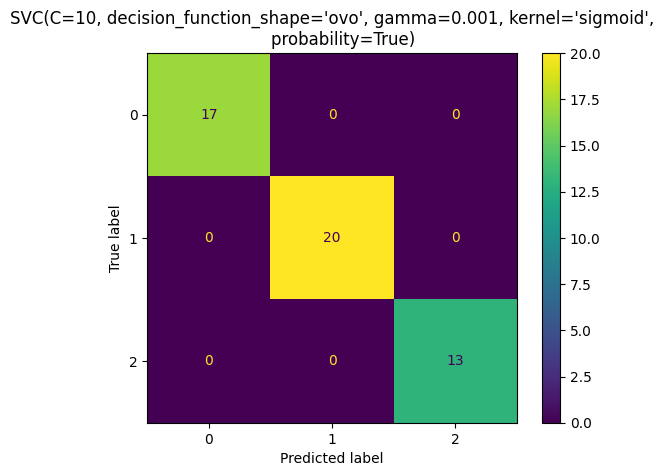

Risultati su Test set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Risultati su Train set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.98      0.99        51
           2       0.97      1.00      0.99        35

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



In [29]:
svm = svm_grid.best_estimator_
%timeit svm.fit(X_train, y_train) # per avere un'idea preliminare di quanto ci metterà; la funzione performance_report fitterà di nuovo l'algoritmo
performance_report(svm)

La matrice è perfetta e generalizza benissimo sui dati di test, non overfitta i dati di training nonostante l'incremento di C, compensato dal decremento di gamma (che porta in direzione 'overfitting', poiché aumenta la sensibilità della funzione verso i punti, ovvero aumenta l'influenza di questi ultimi).

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

params_lr = {
    "C": [0.01, 0.1, 1, 10, 0.01], 
    "solver": ("lbfgs", "saga","liblinear")
}

grid_lr = GridSearchCV(
    estimator=logreg, param_grid=params_lr, scoring="f1_weighted", cv=cv_grid
)

grid_fit_score(grid_lr)

Parametri migliori per LogisticRegression: {'C': 0.1, 'solver': 'lbfgs'}

Risultati della S.k.F.Cross-Validation in grid_search: 0.977 ± 0.019


In [31]:
skfold_valid(grid_lr.best_estimator_, num_of_splits=10)

LogisticRegression(C=0.1, max_iter=1000) 10 folds:
Media S.k.F. cross-validation: 0.984 ± 0.032
Coefficiente di variazione: 3.2475%


,F1
K-Fold,
1,1.000000
2,0.922300
3,1.000000
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,1.000000
9,1.000000


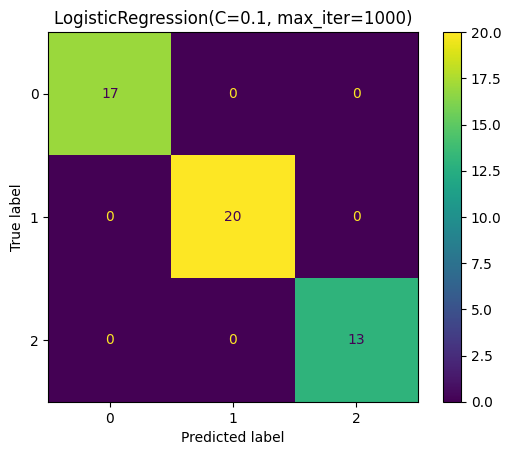

Risultati su Test set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Risultati su Train set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.98      0.99        51
           2       0.97      1.00      0.99        35

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



In [32]:
lr = grid_lr.best_estimator_
performance_report(grid_lr.best_estimator_)

La Confusion Matrix di LogReg è ottima, con 0 errori

Il report è simile a quello di SVM: perfetto nel test set e qualche imperfezione nel training set, un ottimo risultato: LogReg sembra essere un efficace generalizzatore.

Logistic Regression produce un risultato più promettente nei 10 fold stratificati.

Grosso modo i risultati con o senza griglia sono molto simili, sebbene la GridSearch impieghi relativamente molto più tempo per fittare i dati; è normale, essendo una procedura più sofisticata. Siamo comunque nell'ordine dei millisecondi, per cui la differenza non è sensibile.

A proposito dei tempi: il discorso sarebbe diverso laddove avessimo un dataset più ingombrante e potremmo osservare delle differenze relativamente grandi anche in termini assoluti, ma verosimilmente apprezzeremmo anche una maggior performance del modello.

Così come i modelli di Machine Learning 'soffrono' del dilemma Bias-Varianza, similmente nei contesti decisionali si soffre del dilemma 'Tempestività-Precisione': ad ognuno il suo.

In questa circostanza, non c'è motivo di preferire l'algoritmo più complesso, in quanto le performance sono simili o addirittura premiano il modello più semplice.

Per curiosità, provo KNN (per poi fare un ensemble con almeno 3 modelli) e RandomForest.

### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [3,5,7,9,11,13,15],
         'weights': ('uniform','distance')
         }

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(knn, params, verbose=0, n_jobs=-1, cv=cv_grid, scoring='f1_weighted')

grid_fit_score(grid_knn)

Parametri migliori per KNeighborsClassifier: {'n_neighbors': 3, 'weights': 'uniform'}

Risultati della S.k.F.Cross-Validation in grid_search: 0.976 ± 0.019


In [34]:
skfold_valid(grid_knn.best_estimator_, num_of_splits=10)

KNeighborsClassifier(n_neighbors=3) 10 folds:
Media S.k.F. cross-validation: 0.976 ± 0.036
Coefficiente di variazione: 3.7044%


,F1
K-Fold,
1,1.000000
2,0.922300
3,1.000000
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,0.923077
9,1.000000


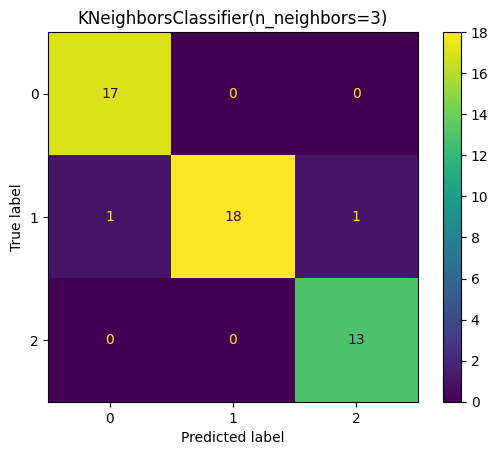

Risultati su Test set:
                precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.90      0.95        20
           2       0.93      1.00      0.96        13

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50


Risultati su Train set:
                precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.96      0.98        51
           2       1.00      1.00      1.00        35

    accuracy                           0.98       128
   macro avg       0.98      0.99      0.99       128
weighted avg       0.99      0.98      0.98       128



In [35]:
knn = grid_knn.best_estimator_
performance_report(knn)

I risultati in SKFold non sono entusiasmanti, pur arrivando ad una media alta. 

Il KNN produce due errori nella matrice di confusione. In generale i risultati non sono tra i migliori.

E' possibile farne 0 come LogReg?

### Random Forest

Nell'ottica di costruire un ensemble dei tre algoritmi piuttusto semplici provati sinora, provo prima un ensemble molto impiegato nei problemi di ML, ovvero il Random Forest.

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42) #random state per riproducibilità
param_grid_rf = {
    'n_estimators': [10, 20, 30, 50, 100], #diversi valori ma verosimilmente verrà scelto uno basso
    'max_depth': [None, 3, 5, 7, 10],  # range ampio per coprire le possibilità di overfit ed underfit;
    'min_samples_split': [2, 3, 5, 7, 10] # negli alberi vale la seguente regola generale: aumento degli iperparametri 'min_*' o diminuzione 'max_*' per regolarizzare
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv_grid, n_jobs=-1, verbose=0, scoring='f1_weighted')

grid_fit_score(grid_rf)

Parametri migliori per RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

Risultati della S.k.F.Cross-Validation in grid_search: 0.977 ± 0.019


In [37]:
skfold_valid(grid_rf.best_estimator_, num_of_splits=10)

RandomForestClassifier(min_samples_split=5, random_state=42) 10 folds:
Media S.k.F. cross-validation: 0.975 ± 0.053
Coefficiente di variazione: 5.3855%


,F1
K-Fold,
1,1.000000
2,0.835914
3,1.000000
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,1.000000
9,1.000000


117 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


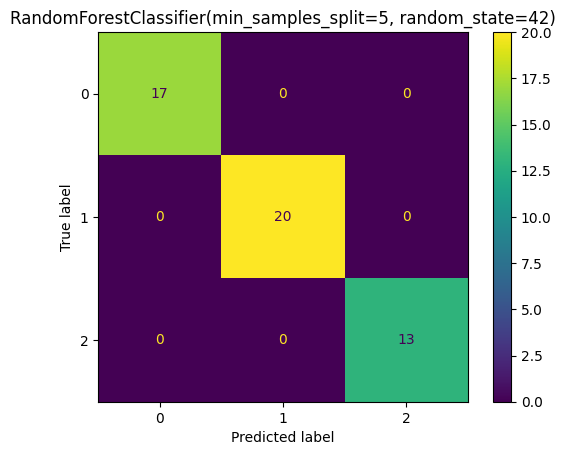

Risultati su Test set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Risultati su Train set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        35

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



In [38]:
rf = grid_rf.best_estimator_
%timeit rf.fit(X_train, y_train)
performance_report(rf)

Il Random Forest ottiene un punteggio perfetto, sbagliando 0 etichette sia in training che in test, così come nel classification report mostra risultati formidabili.

Nella validazione per S.k.F., tuttavia, il punteggio è meno 'promettente' rispetto a Logistic Regression, superandola meno brillantemente del 'rivale'. I punteggi sono tutti pari a 1 eccetto due fold in cui si allontana tantissimo dalla media (in uno di 3 dev.std. circa , nell'altro quasi 2), con dev.std. un po' alta.

Inoltre, impiega più tempo degli altri, essendo un modello più complesso.

### Ensemble

L'algoritmo di LogReg sembra essere molto promettente; tuttavia, avendo sviluppato 3 algoritmi abbastanza semplici, provo a combinarli in un ensemble.

Userò i parametri trovati prima per 'sintonizzare' i diversi modelli:

In [39]:
clf1 = svm
clf2 = lr
clf3 = knn

from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('SVC',clf1),
                                        ('LR', clf2),
                                        ('KNN', clf3)],
    voting='soft')

In [40]:
skfold_valid(ensemble, num_of_splits=10)

VotingClassifier(estimators=[('SVC',
                              SVC(C=10, decision_function_shape='ovo',
                                  gamma=0.001, kernel='sigmoid',
                                  probability=True)),
                             ('LR', LogisticRegression(C=0.1, max_iter=1000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft') 10 folds:
Media S.k.F. cross-validation: 0.976 ± 0.036
Coefficiente di variazione: 3.7044%


,F1
K-Fold,
1,1.000000
2,0.922300
3,1.000000
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,0.923077
9,1.000000


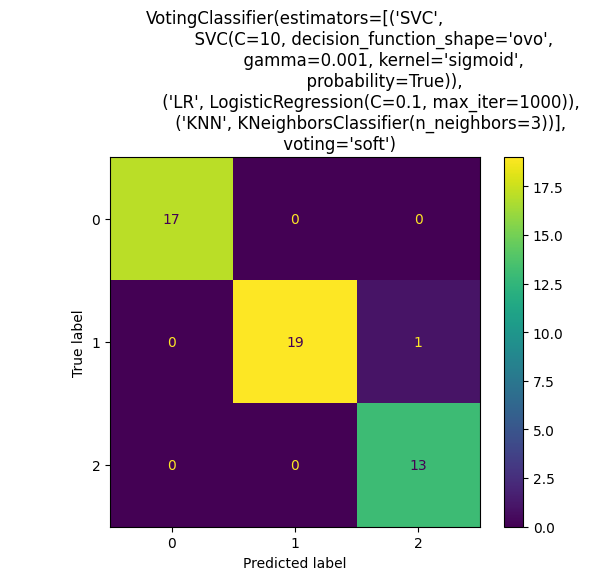

Risultati su Test set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.95      0.97        20
           2       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50


Risultati su Train set:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.98      0.99        51
           2       0.97      1.00      0.99        35

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



In [41]:
performance_report(ensemble)

L'ensemble produce una buona confusion matrix (anche se sembra overfittare un po' i dati di training) e buoni risultati in SKFold.

## Considerazioni finali

Sono stati addestrati modelli che impiegavano diversi algoritmi; tutti sono stati capaci di ottenere risultati molto soddisfacenti, sebbene si tratti comunque di un dataset poco sofisticato.

Ci sono delle differenze nei risultati della validazione, più riguardo la stabilità (std.dev.) piuttosto che nella media dei punteggi, complessivamente omogenea tra i diversi modelli.

Nella validazione, il modello migliore sembra essere __Logistic Regression__ per la sua stabilità e bassissimo coefficiente di variazione, così come l'__Ensemble__: 

Qui sotto riporto dei grafici riepilogativi che mettono a
confronto i tempi e F1-Score di ciascuno dei modelli addestrati precedentemente.

In [42]:
models = {
    'SVM': svm,
    'KNN': knn,
    'Random Forest': rf,
    'Logistic Regression': lr,
    'Ensemble':ensemble
}

risultati = {}

# questo codice crea un dizionario contenente i nomi, i tempi di fit e predict e il punteggio F1 per ciascuno dei modelli visti finora; mi permette di creare un df di appoggio da cui rappresentare graficamente le variabili di interesse

for name, model in models.items():
    fit_time = %timeit -o model.fit(X_train, y_train)
    predict_time = %timeit -o model.predict(X_test)
    
    y_pred = model.predict(X_test)
    f1score = f1_score(y_test, y_pred, average='weighted')

    risultati[name] = {
        'Media Tempo Fitting': fit_time.average,
        'STD Tempo Fitting': fit_time.stdev,
        'Media Tempo Predict': predict_time.average,
        'STD Tempo Predict': predict_time.stdev,
        'F1-Score': f1score
    }

df_times = pd.DataFrame.from_dict(risultati, orient='index')
df_times

3.85 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
311 µs ± 9.77 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
495 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.95 ms ± 73.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
119 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.12 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.03 ms ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
75.3 µs ± 658 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.13 ms ± 427 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.14 ms ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


,Media Tempo Fitting,STD Tempo Fitting,Media Tempo Predict,STD Tempo Predict,F1-Score
SVM,0.003848,0.000210,0.000311,9.772030e-06,1.000000
KNN,0.000495,0.000002,0.002950,7.305671e-05,0.959603
Random Forest,0.118810,0.002263,0.007123,2.327616e-04,1.000000
Logistic Regression,0.002027,0.000018,0.000075,6.575777e-07,1.000000
Ensemble,0.008130,0.000427,0.001141,2.268819e-05,0.980114


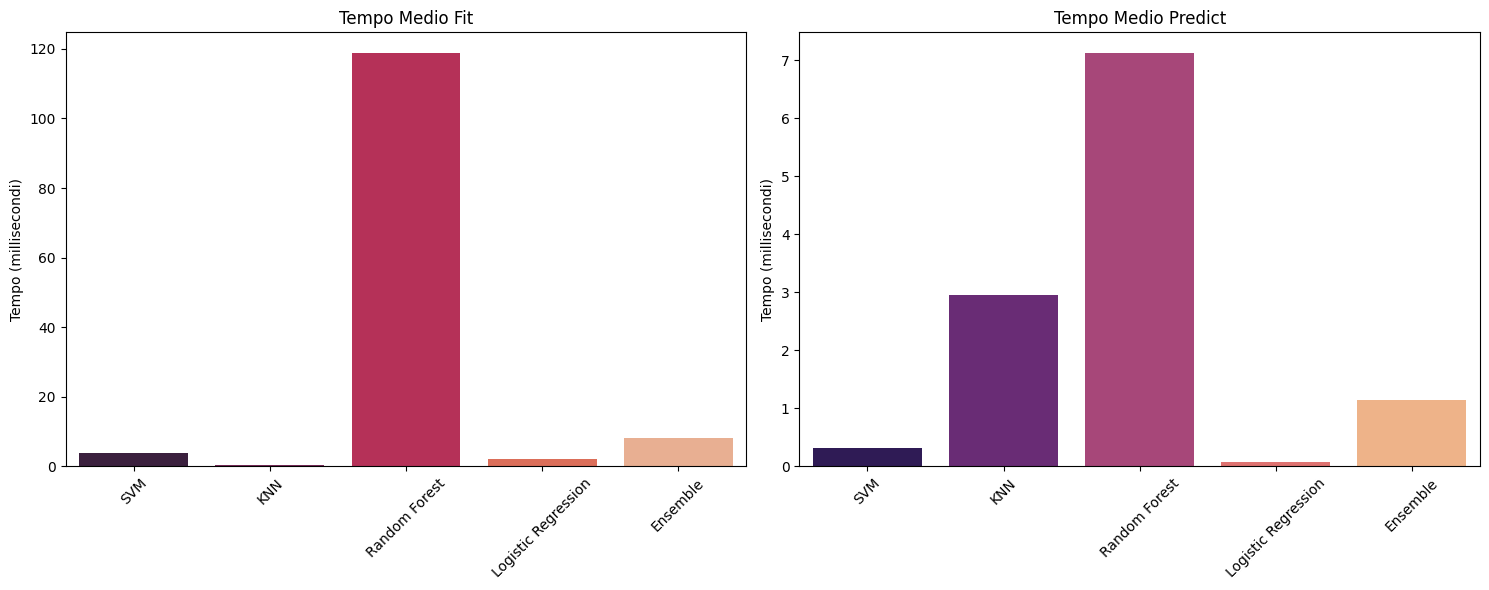

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.3)


sns.barplot(
    x=df_times.index, 
    y=df_times["Media Tempo Fitting"]*1000, 
    ax=ax[0], 
    palette='rocket')

ax[0].set_title("Tempo Medio Fit")
ax[0].set_xlabel('')
ax[0].set_ylabel('Tempo (millisecondi)')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x=df_times.index, 
    y=df_times["Media Tempo Predict"]*1000, 
    ax=ax[1], 
    palette='magma')

ax[1].set_title("Tempo Medio Predict")
ax[1].set_xlabel('')
ax[1].set_ylabel('Tempo (millisecondi)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("tempi.png") 

plt.show()

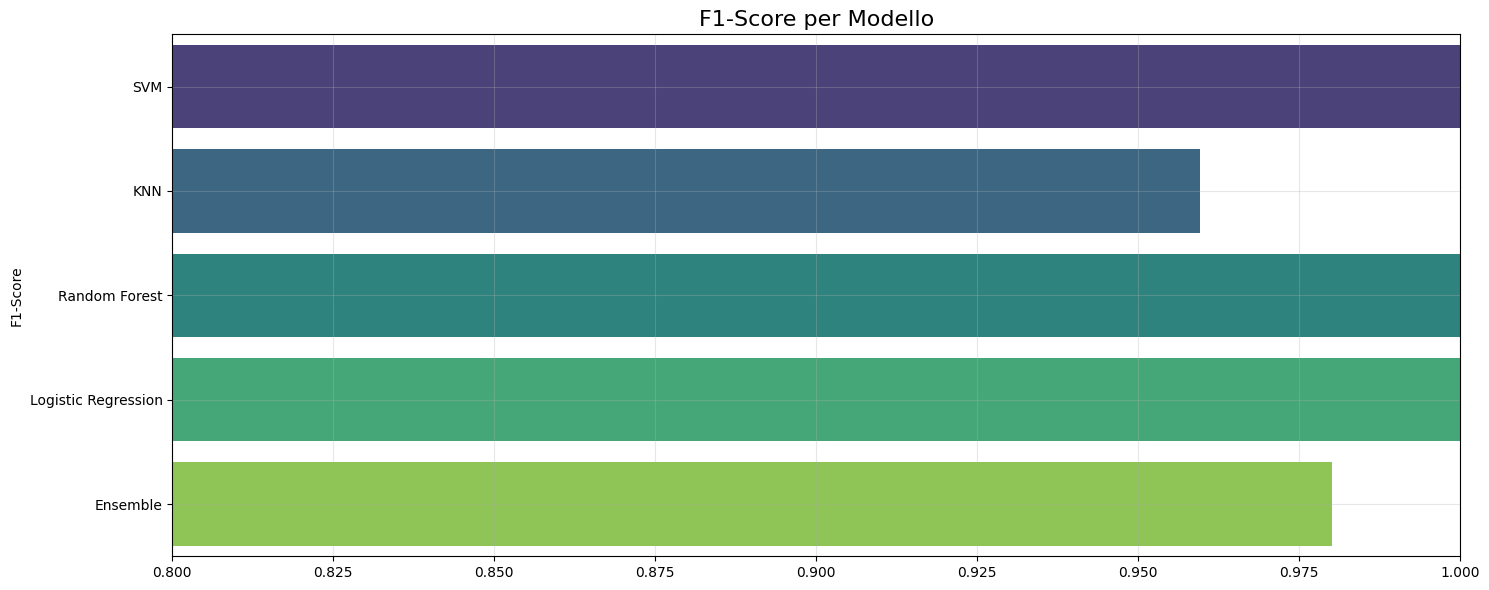

In [44]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(
    orient='h', 
    y=df_times.index, 
    x=df_times["F1-Score"], 
    palette='viridis', 
    ax=ax)

ax.set_title("F1-Score per Modello", fontsize=16)
ax.set_ylabel("F1-Score")
ax.set_xlabel("")

ax.set_xlim(0.8, 1)
plt.grid(alpha=.3)
plt.tight_layout()

plt.savefig("f1scores.png") 

plt.show()

## Conclusione: quale modello scegliere?

Come detto precedentemente, la scelta del modello è subordinata non solo alla sua performance in termini di punteggio (F1, Recall etc.) bensì anche al costo computazionale, esprimibile sia in hardware richiesto per effettuare i calcoli,
sia nel tempo necessario affinché questi vengano completati. 

Il problema in esame non è in un ambito critico, come può essere quello medico o legale: questo ci permette di non badare troppo all'interpretabilità del modello e di concentrarci esclusivamente sulle performance. 

Qual è la destinazione di uso del modello richiesto? Se si tratta, ad esempio, di progettare un algoritmo per un sistema di raccomandazione prodotti, potremmo anche sacrificare un po' di tempestività ed optare per il Random Forest; 
se invece è la velocità il parametro principale a cui riferirsi, occorre fare una breve speculazione: è vero che con molti più dati a disposizione, la differenza di tempo (qui poco percettibile, espressa in frazioni di secondi) sarebbe
tale da rappresentare potenzialmente un ostacolo. Tuttavia, in tale contesto, un algoritmo più complesso come lo è il R.F. sarebbe in grado di produrre risultati verosimilmente più soddisfacenti. 
Nel problema affrontato in questo notebook,  gli altri algoritmi (meno sofisticati) sono stati in grado di ottenere risultati promettenti: __SVM__ e __Logistic Regression__ hanno etichettato correttamente tutti i samples del set test.

Nella validazione a 10 folds, LogReg ha ottenuto un risultato leggermente migliore (minor std. dev.) ed è anche più veloce, essendo meno complesso. 

Consiglierei l'impiego di __Logistic Regression__.


### Salvataggio del modello: libreria Pickle

In [45]:
import pickle 
  
saved_model_lr = pickle.dumps(lr) 

lr_pickle = pickle.loads(saved_model_lr) 

In [46]:
lr_pickle

LogisticRegression(C=0.1, max_iter=1000)